Nama : Gervasius Russell 

NIM : 2702257450

a. Gender = Laki-laki atau Wanita

b. Age = Usia seseorang dalam tahun

c. Height = Tinggi dalam meter

d. Weight = Berat dalam kilogram

e. family_history_with_overweight = Riwayat keluarga dengan kelebihan berat badan (ya/tidak)

f. FAVC = Frekuensi konsumsi makanan berkalori tinggi (ya/tidak)

g. FCVC = Frekuensi konsumsi sayuran (skala 1-3)

h. NCP = Jumlah makanan utama per hari

i. CAEC = Frekuensi konsumsi makanan di antara waktu makan (Tidak pernah, Kadang-kadang, Sering, Selalu)

j. SMOKE = Status merokok (ya/tidak)

k. CH2O = Asupan air harian (skala 1-3)

l. SCC = Pemantauan asupan kalori (ya/tidak)

m. FAF = Frekuensi aktivitas fisik (skala 0-3)

n. TUE = Waktu penggunaan teknologi (skala 0-3)

o. CALC = Frekuensi konsumsi alkohol (Tidak pernah, Kadang-kadang, Sering, Selalu)

p. MTRANS = Moda transportasi utama (Mobil, Sepeda, Sepeda Motor, Transportasi Umum, Jalan Kaki)

q. NObeyesedad = Tingkat obesitas (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

## **1. Exploratory Data Analysis**

### 1.1 Loading data and data overview

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("ObesityDataSet2.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


In [ ]:
def data_overview(df):
    print("=== DataFrame Info ===")
    df.info()
    
    print("\n=== Shape ===")
    print(df.shape)
    
    print("\n=== Columns ===")
    print(df.columns.tolist())

    print("\n=== Missing Values ===")
    print(df.isnull().sum())

    print("\n=== Number of Duplicate Rows ===")
    print(df.duplicated().sum())

    print("\n=== Numerical Summary (describe) ===")
    print(df.describe())


data_overview(df)

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF        

saya membuat function untuk EDA agar lebih rapih dan yang bisa kita dapatkan adalah terdapat 10 duplicate dan ada missing value di feature FCVC dan MTRANS yang merupakan float dan object respectivel. untuk AGE juga merupakan obejct yang harusnya adalah int

In [3]:
### Handling Duplicate Rows

duplicate_all = df[df.duplicated(keep=False)]
print(f"Total baris yang termasuk dalam duplikat (termasuk original): {duplicate_all.shape[0]}")
display(duplicate_all)

print("===================")

def remove_duplicates(df):
    initial_count = df.shape[0]
    df_cleaned = df.drop_duplicates()
    final_count = df_cleaned.shape[0]
    print(f"Removed {initial_count - final_count} duplicate rows.")
    return df_cleaned

df = remove_duplicates(df)


Total baris yang termasuk dalam duplikat (termasuk original): 15


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
7,Female,18,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
50,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
96,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
227,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
252,Female,16,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
285,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
326,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
436,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
516,Female,21,1.52,42.0,no,yes,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight


Removed 10 duplicate rows.


In [4]:
# cek feature age yang merupakan object harusnya numeric
df['Age'].unique()

array(['24', '23', '21', '22', '26', '18', '25', '20', '32', '20 years',
       '19', '38', '34', '44', '39', '22 years', '41', '31', '17 years',
       '17', '29', '42', '27', '16', '25 years', '40', '21 years', '33',
       '30', '37', '35', '36', '15', '19 years', '28', '55', '46',
       '36 years', '26 years', '45', '33 years', '43', '51', '48',
       '23 years', '14'], dtype=object)

In [5]:
# setelah dicek, ada yang berupa string dengan 'xx years'
# sekarang kita akan delete years dan ubah menjadi numeric
df['Age'] = df['Age'].str.replace(' years', '', regex=False)
# ubah tipe data Age menjadi numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# cek apakah ada yang masih string
print(df['Age'].unique())
# cek dtipe data Age
print(df['Age'].dtype)

[24 23 21 22 26 18 25 20 32 19 38 34 44 39 41 31 17 29 42 27 16 40 33 30
 37 35 36 15 28 55 46 45 43 51 48 14]
int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1046 non-null   object 
 1   Age                             1046 non-null   int64  
 2   Height                          1046 non-null   float64
 3   Weight                          1046 non-null   float64
 4   family_history_with_overweight  1046 non-null   object 
 5   FAVC                            1046 non-null   object 
 6   FCVC                            1009 non-null   float64
 7   NCP                             1046 non-null   float64
 8   CAEC                            1046 non-null   object 
 9   SMOKE                           1046 non-null   object 
 10  CH2O                            1046 non-null   float64
 11  SCC                             1046 non-null   object 
 12  FAF                             10

In [ ]:
# Check min max features for streamlit slider
# for streamlit i want to see the minimum and maximum of each column in the training dataset
def get_min_max(df):
    min_max = {}
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            min_max[column] = {
                'min': df[column].min(),
                'max': df[column].max()
            }
    return min_max

min_max_train = get_min_max(df)
print("Minimum and Maximum values in Training Dataset:")
for column, values in min_max_train.items():
    print(f"{column}: Min = {values['min']}, Max = {values['max']}")

Minimum and Maximum values in Training Dataset:
Age: Min = 14, Max = 55
Height: Min = 1.45, Max = 1.95
Weight: Min = 39.0, Max = 173.0
FCVC: Min = 1.0, Max = 3.0
NCP: Min = 1.0, Max = 4.0
CH2O: Min = 1.0, Max = 3.0
FAF: Min = 0.0, Max = 3.0
TUE: Min = 0.0, Max = 2.0


### 1.2 Analisa fitur

Analisa fitur object


Unique values in Gender: ['Female' 'Male']


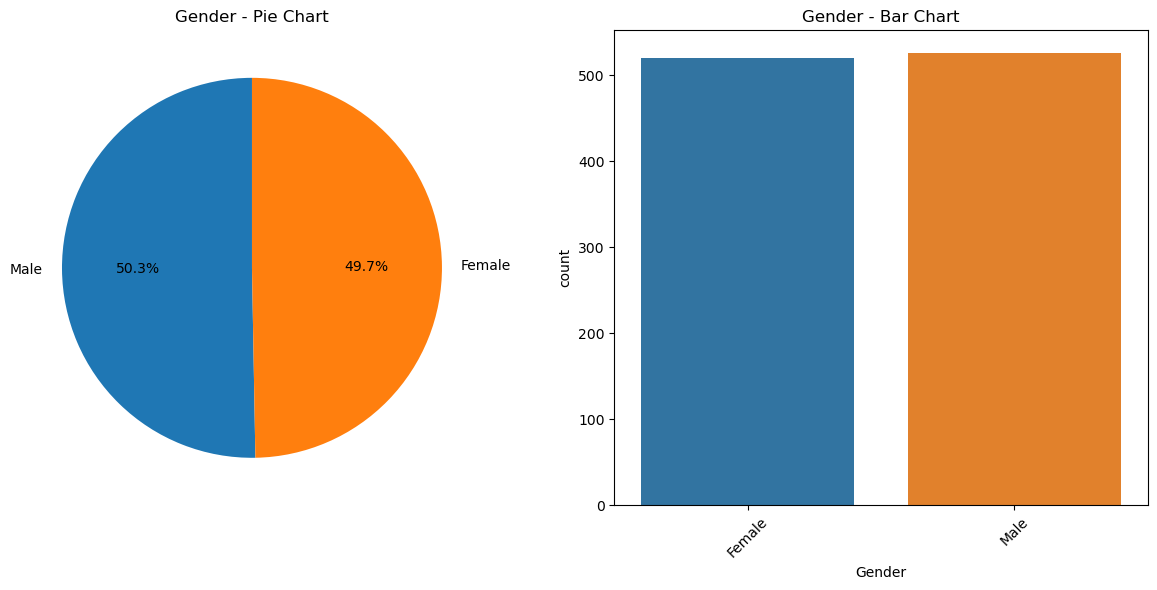

Unique values in family_history_with_overweight: ['yes' 'no']


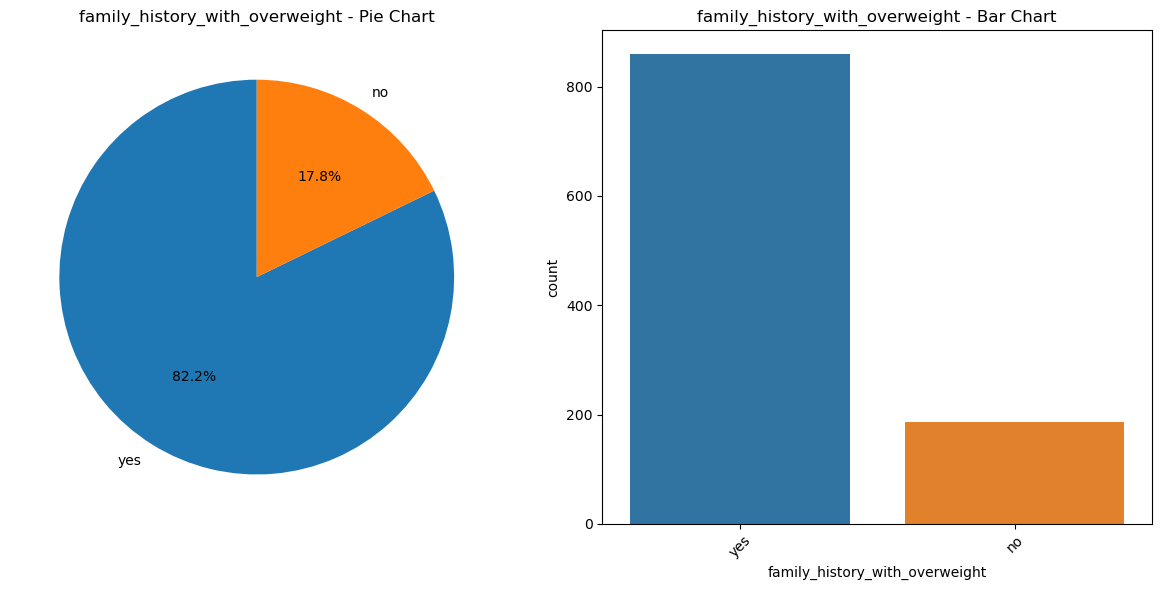

Unique values in FAVC: ['no' 'yes']


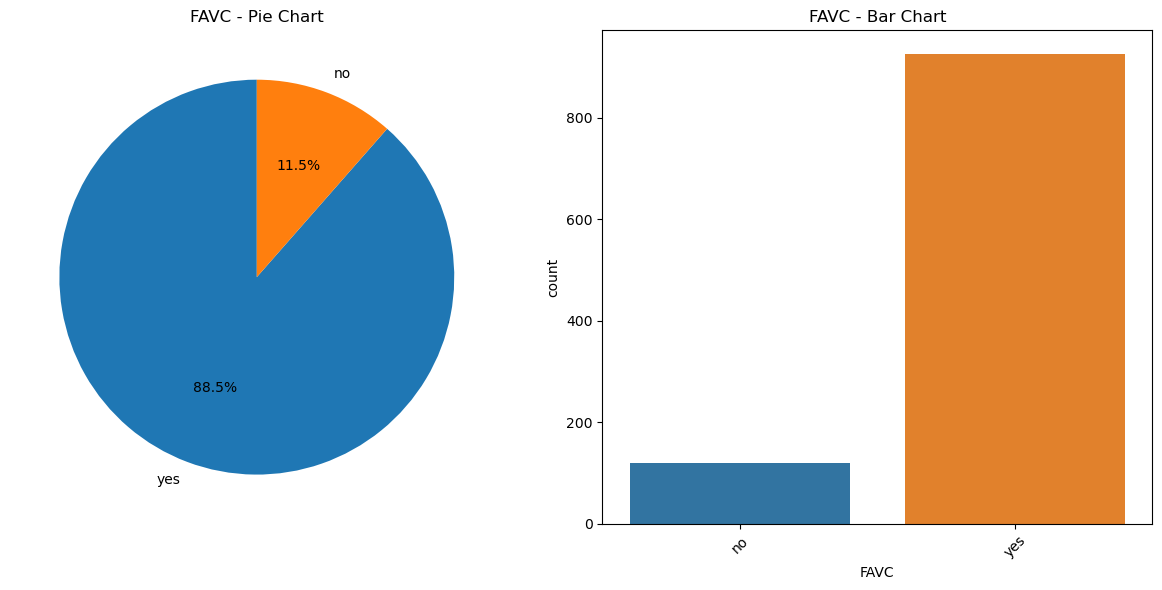

Unique values in CAEC: ['Sometimes' 'Frequently' 'no' 'Always']


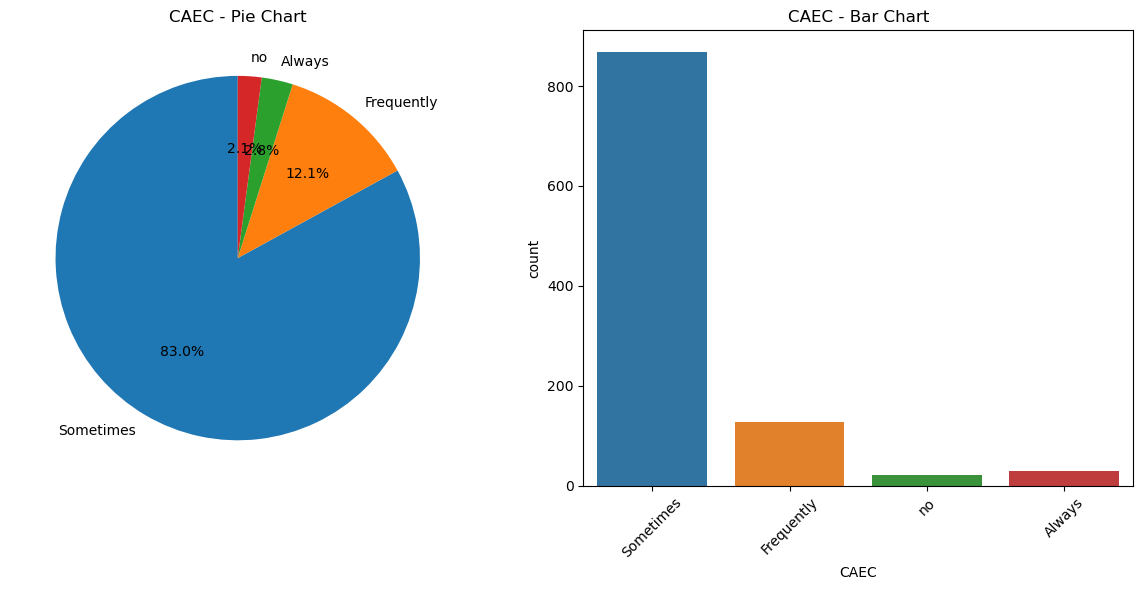

Unique values in SMOKE: ['no' 'yes']


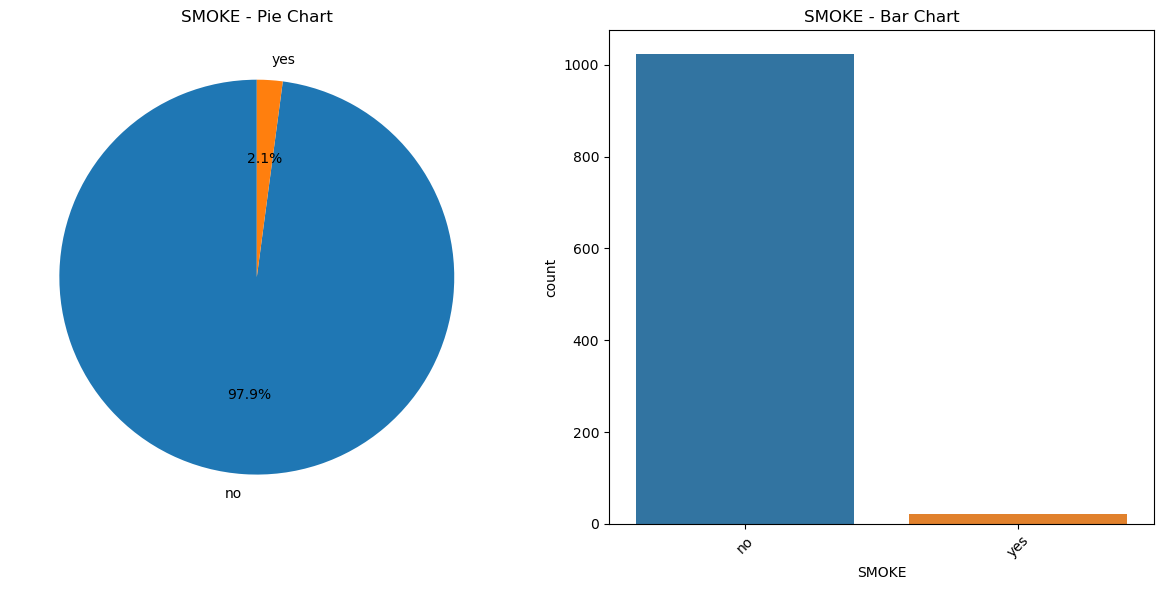

Unique values in SCC: ['no' 'yes']


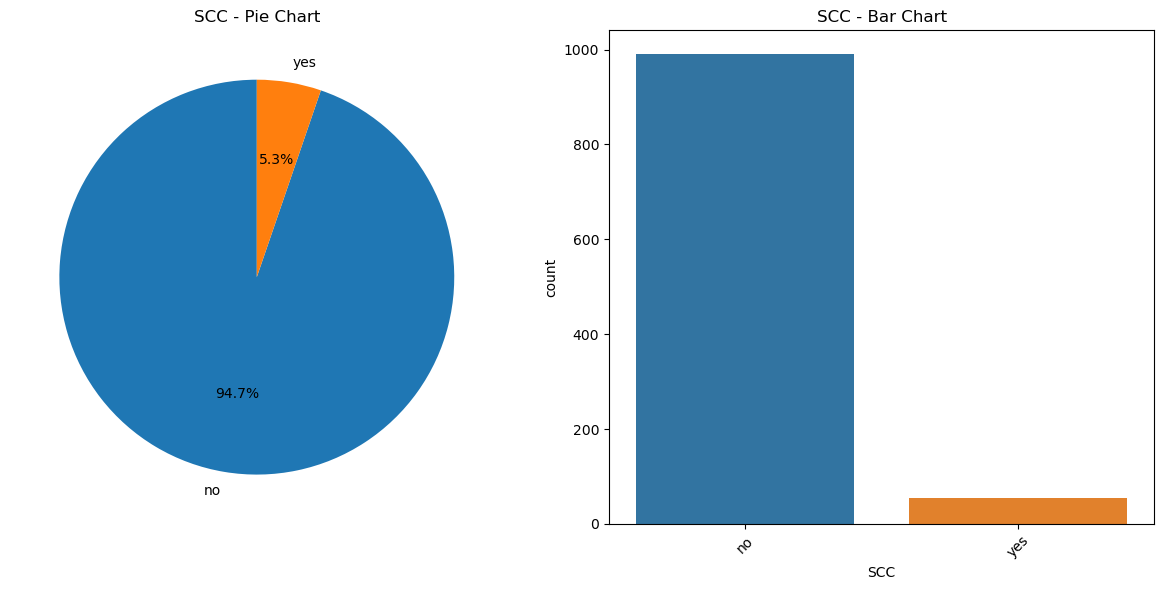

Unique values in CALC: ['no' 'Sometimes' 'Frequently' 'Always']


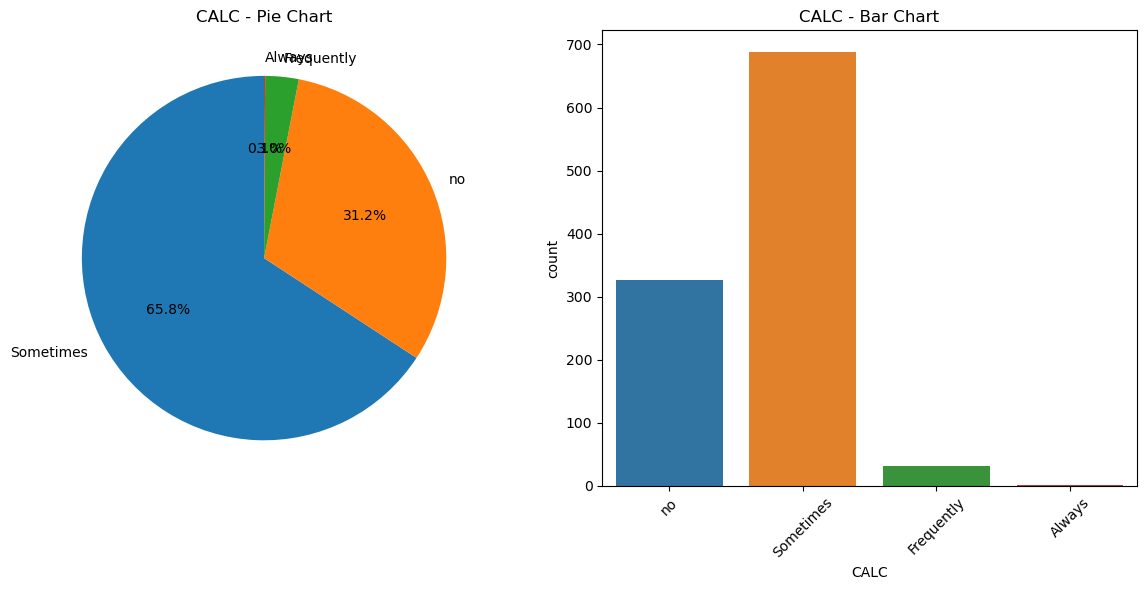

Unique values in MTRANS: ['Public_Transportation' 'Bike' nan 'Automobile' 'Motorbike' 'Walking']


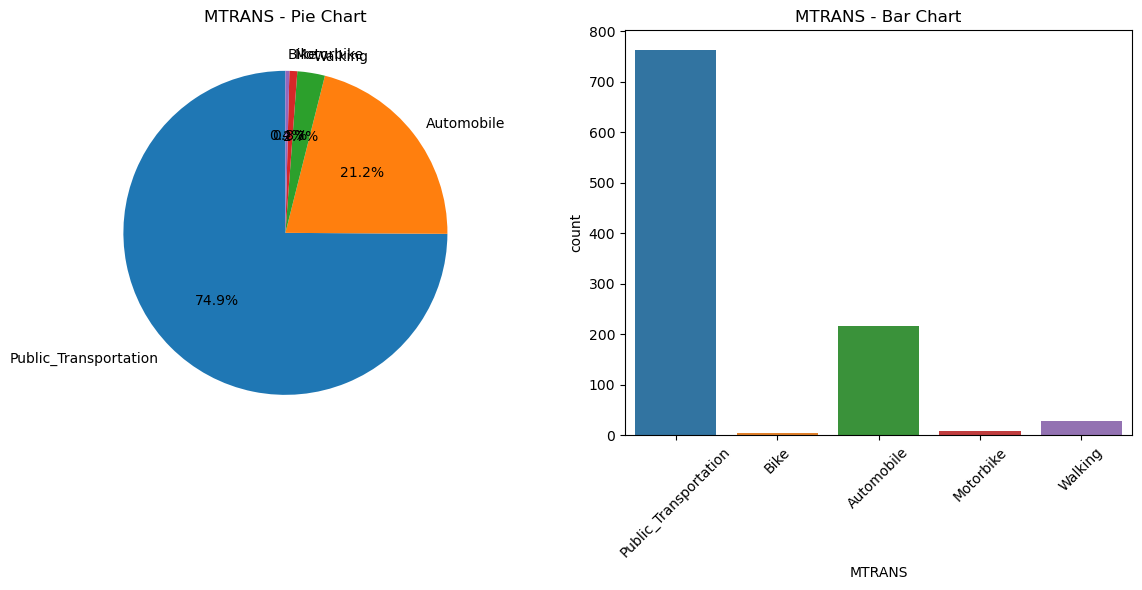

Unique values in NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_I' 'Obesity_Type_III' 'Overweight_Level_I'
 'Obesity_Type_II']


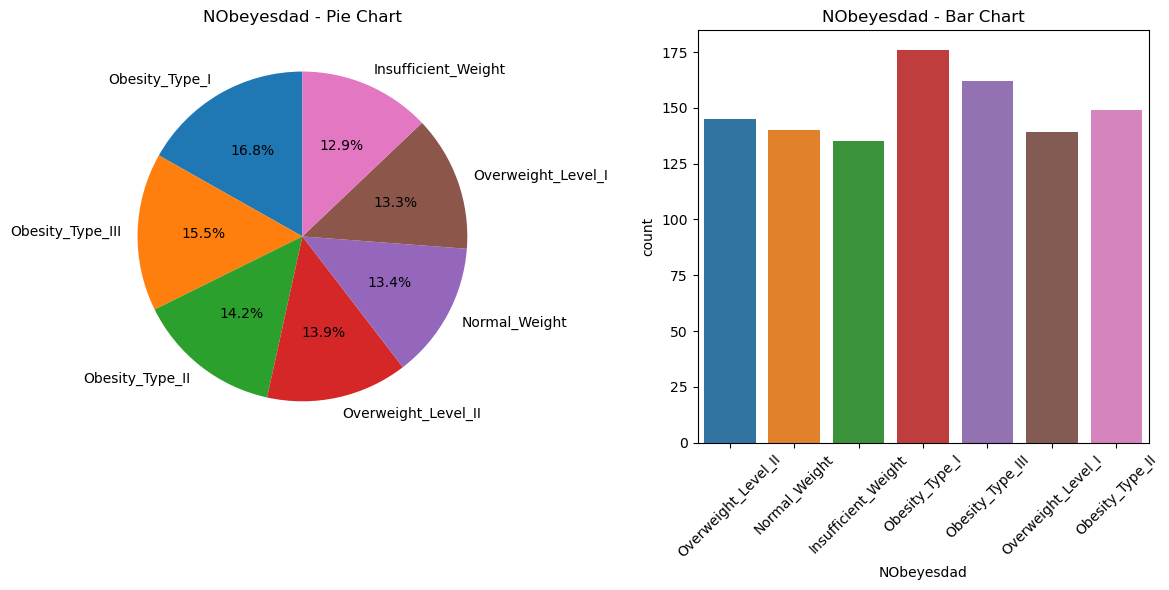

In [8]:
# analisa fitur object dengan pie plot dan bar plot 
import matplotlib.pyplot as plt
import seaborn as sns
def plot_categorical_features(df):
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    for col in categorical_cols:
        print(f"Unique values in {col}: {df[col].unique()}")
        
        plt.figure(figsize=(12, 6))
        
        # Pie plot
        plt.subplot(1, 2, 1)
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title(f'{col} - Pie Chart')
        plt.ylabel('')  # Hide the y-label
        
        # Bar plot
        plt.subplot(1, 2, 2)
        sns.countplot(data=df, x=col)
        plt.title(f'{col} - Bar Chart')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

plot_categorical_features(df)

Analisa fitur numerik


=== Numeric Features ===
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

=== Analysis for Age ===
count    1046.000000
mean       24.273423
std         6.337237
min        14.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        55.000000
Name: Age, dtype: float64


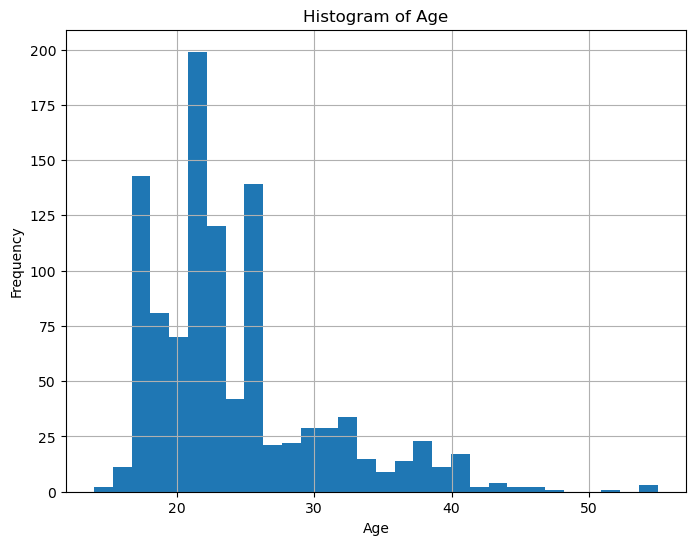

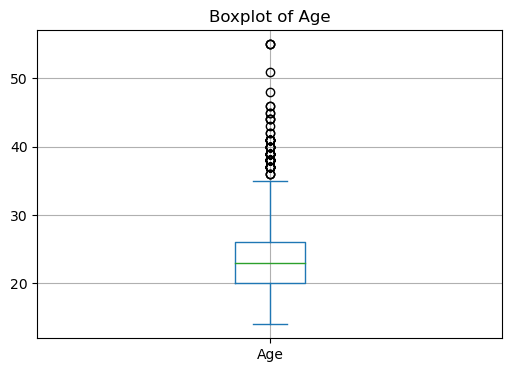


=== Analysis for Height ===
count    1046.000000
mean        1.700822
std         0.091582
min         1.450000
25%         1.630000
50%         1.700000
75%         1.760000
max         1.950000
Name: Height, dtype: float64


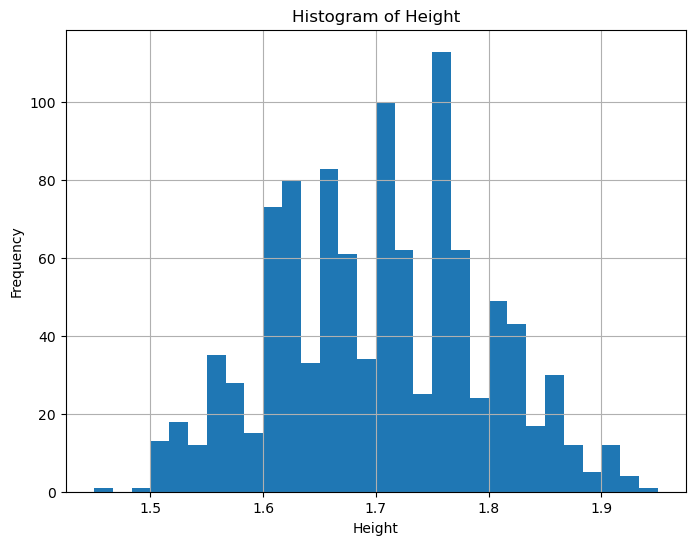

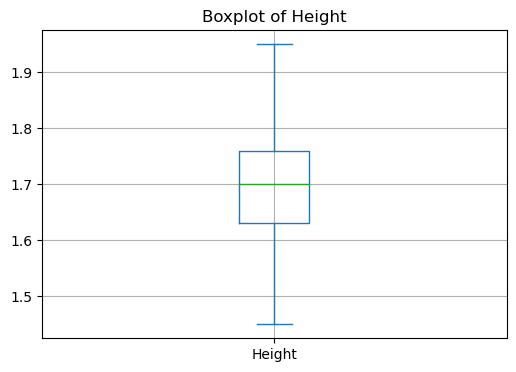


=== Analysis for Weight ===
count    1046.000000
mean       86.712715
std        26.198150
min        39.000000
25%        66.125000
50%        83.000000
75%       108.035000
max       173.000000
Name: Weight, dtype: float64


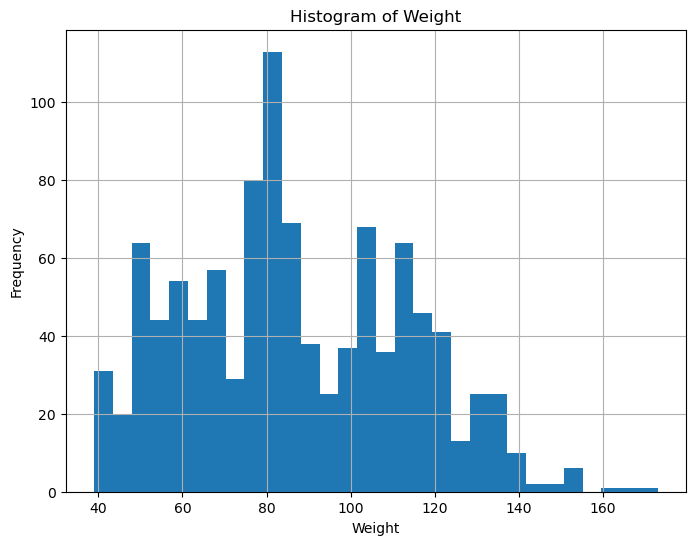

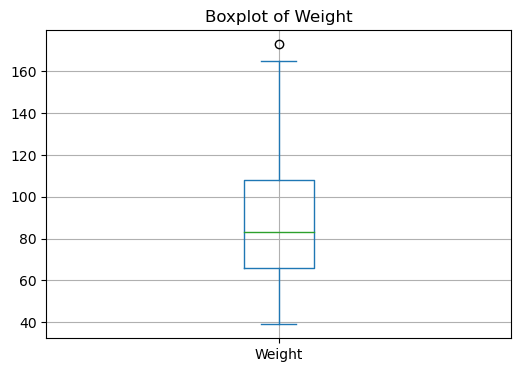


=== Analysis for FCVC ===
count    1009.000000
mean        2.424559
std         0.538464
min         1.000000
25%         2.000000
50%         2.400000
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64


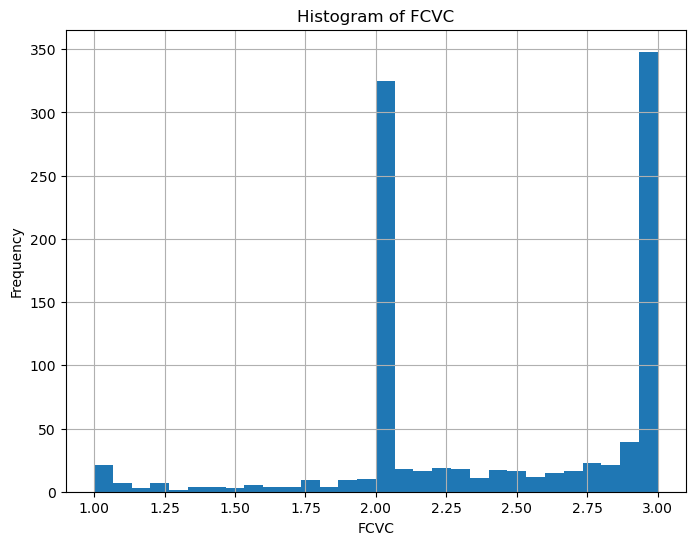

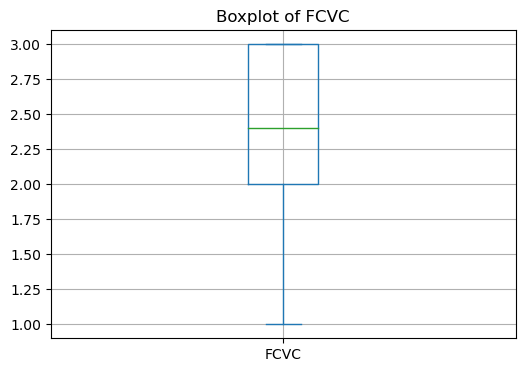


=== Analysis for NCP ===
count    1046.000000
mean        2.663652
std         0.795036
min         1.000000
25%         2.592500
50%         3.000000
75%         3.000000
max         4.000000
Name: NCP, dtype: float64


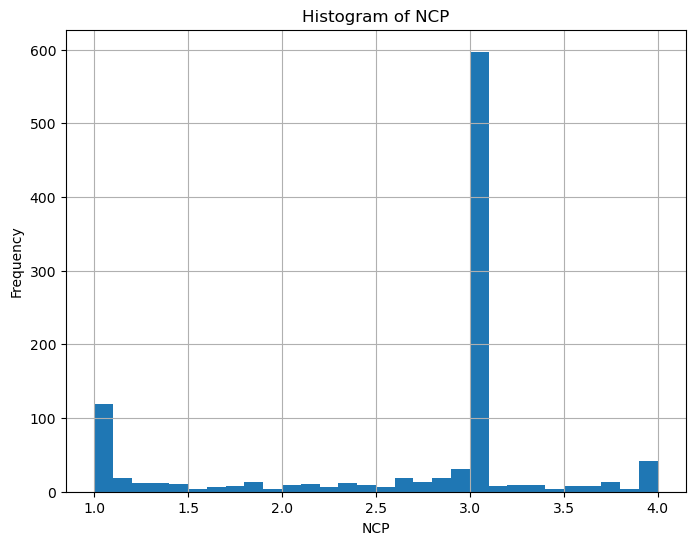

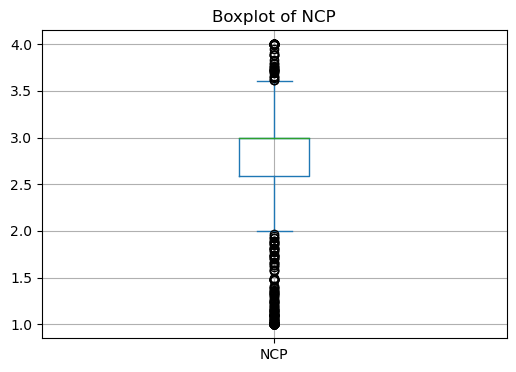


=== Analysis for CH2O ===
count    1046.000000
mean        1.995115
std         0.608807
min         1.000000
25%         1.530000
50%         2.000000
75%         2.440000
max         3.000000
Name: CH2O, dtype: float64


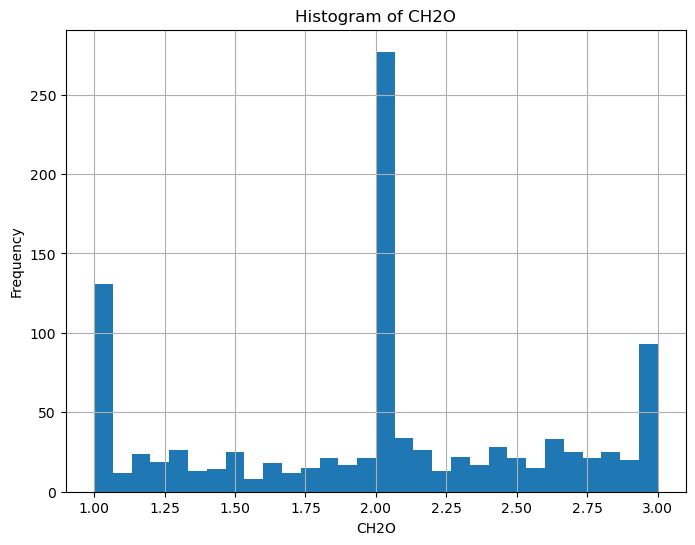

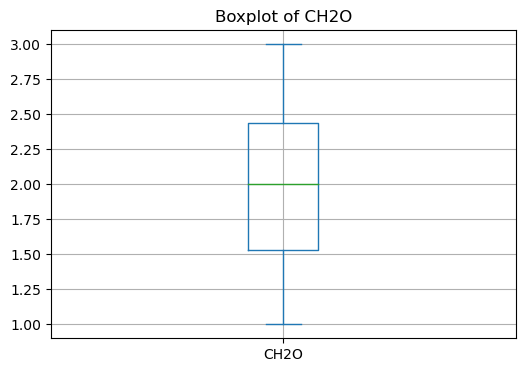


=== Analysis for FAF ===
count    1046.000000
mean        0.989321
std         0.853416
min         0.000000
25%         0.110000
50%         1.000000
75%         1.610000
max         3.000000
Name: FAF, dtype: float64


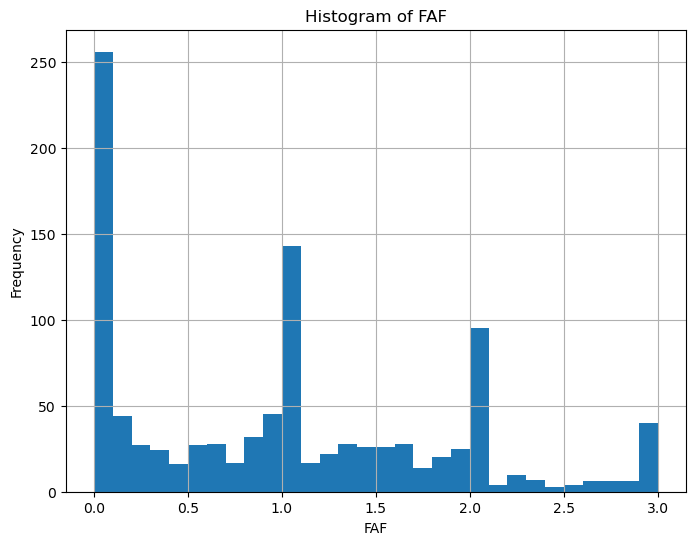

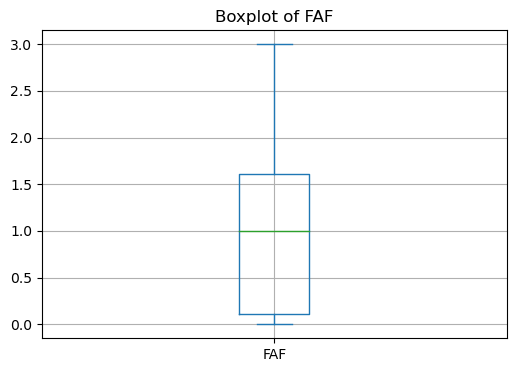


=== Analysis for TUE ===
count    1046.000000
mean        0.645499
std         0.615926
min         0.000000
25%         0.000000
50%         0.585500
75%         1.000000
max         2.000000
Name: TUE, dtype: float64


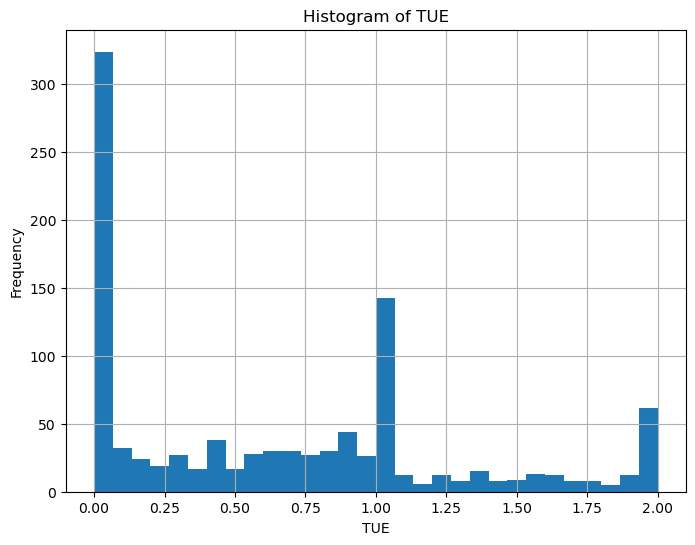

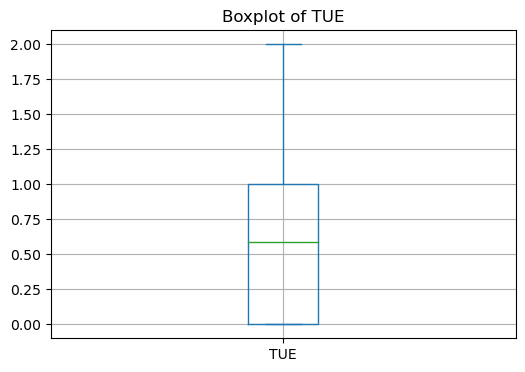

In [9]:
import matplotlib.pyplot as plt
# analisa fitur numerik

def numeric_feature_analysis(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    print("\n=== Numeric Features ===")
    print(numeric_cols)
    
    for col in numeric_cols:
        print(f"\n=== Analysis for {col} ===")
        print(df[col].describe())
        
        # Histogram
        plt.figure(figsize=(8, 6))
        df[col].plot(kind='hist', bins=30, title=f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
        
        # Boxplot
        plt.figure(figsize=(6, 4))
        df[col].plot(kind='box', title=f'Boxplot of {col}')
        plt.grid(True)
        plt.show()


# Analyze numeric features
numeric_feature_analysis(df)

Corr Plot

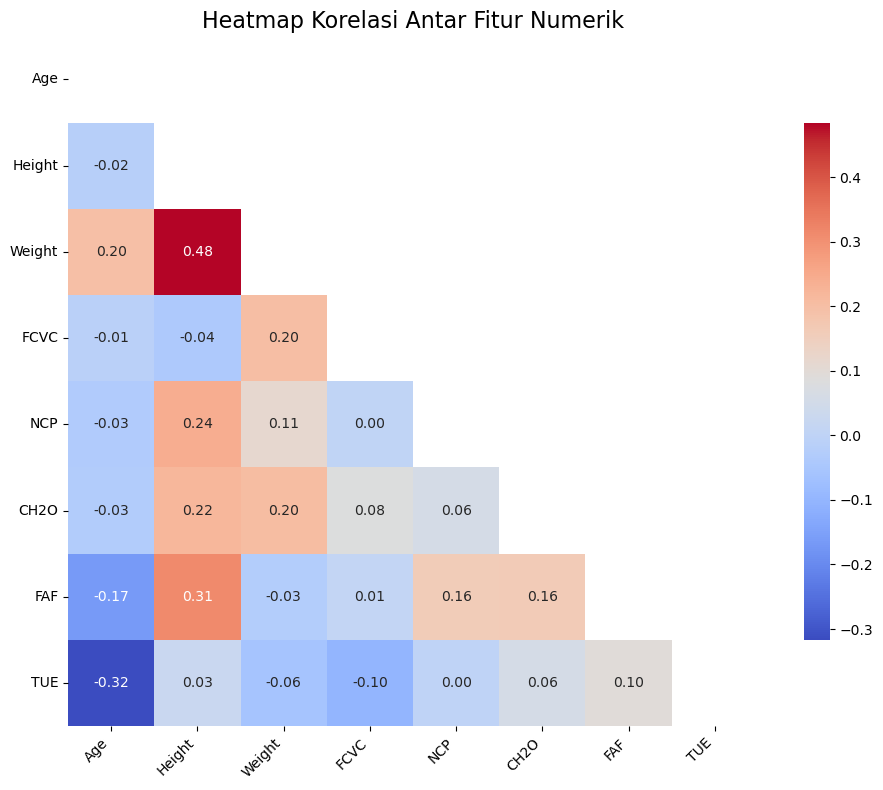

In [10]:
# Dataset Training
import seaborn as sns
import numpy as np

# Pilih seluruh kolom numerik secara otomatis
numerik_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung matriks korelasi
correlation_matrix = numerik_df.corr()

# Visualisasikan dengan heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
            square=True, cbar_kws={"shrink": 0.75})

plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Kesimpulan


object: target var kita 'NObeyesdad' memiliki 7 unique value

numerik: hanya 1 feature yang memiliki outlier banyak

corrplot: weight dan height berkorelasi cukup kuat

## **2. Data Preprocessing Menggunakan Pipeline**

In [11]:
# ==============================================================================
# Bagian 1: Impor Library
# ==============================================================================
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# ==============================================================================
# Bagian 2: Definisi Kolom Berdasarkan Tipe
# ==============================================================================
# Numerik 
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Kategorikal biner (yes/no atau male/female)
binary_categorical = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Kategorikal biasa
multiclass_categorical = ['CAEC', 'CALC', 'MTRANS']

# Target (tidak termasuk dalam pipeline)
target_column = 'NObeyesedad'

# ==============================================================================
# Bagian 3: Definisi Transformer untuk Setiap Tipe Fitur
# ==============================================================================

# Pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk kategorikal biner
binary_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='if_binary',handle_unknown='ignore', sparse_output=False))
])

# Pipeline untuk kategorikal non-biner
multiclass_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop = "first", handle_unknown='ignore'))
])

# ==============================================================================
# Bagian 4: ColumnTransformer untuk Menggabungkan Semua
# ==============================================================================
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('bin_cat', binary_categorical_transformer, binary_categorical),
    ('multi_cat', multiclass_categorical_transformer, multiclass_categorical)
])

# Pipeline akhir
final_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor)
])

print("✅ Pipeline preprocessing berhasil")

✅ Pipeline preprocessing berhasil


In [12]:
# Pemisahan fitur dengan target
# Features
X = df.drop('NObeyesdad', axis=1)

# Target variable 
y = df['NObeyesdad']

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Comparing Models dengan Pipeline**

In [14]:
# === Model Evaluation ===
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)

# === Classifiers ===
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# === Preprocessing & Pipeline ===
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# === Cross-validation ===
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split



models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "LGBMClassifier": LGBMClassifier(verbose=-1),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    acc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')

    results.append({
        "Model": model_name,
        "Mean Accuracy": np.mean(acc_scores),
        "F1 Macro": np.mean(f1_scores)
    })

    print(f"\n{model_name} — Evaluation")
    print(classification_report(y_test, y_pred))


RandomForestClassifier — Evaluation
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.96      0.93        26
      Normal_Weight       0.85      0.85      0.85        41
     Obesity_Type_I       0.92      0.97      0.95        36
    Obesity_Type_II       1.00      0.96      0.98        27
   Obesity_Type_III       1.00      1.00      1.00        28
 Overweight_Level_I       0.79      0.86      0.83        22
Overweight_Level_II       0.96      0.80      0.87        30

           accuracy                           0.91       210
          macro avg       0.92      0.92      0.92       210
       weighted avg       0.92      0.91      0.91       210


LGBMClassifier — Evaluation
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        26
      Normal_Weight       0.95      0.95      0.95        41
     Obesity_Type_I       0.85      0.97      0.91        36
    Obesity_Typ

In [15]:
import pandas as pd

results_df = pd.DataFrame(results)
print("\nSummary of All Models:")
print(results_df.sort_values(by="F1 Macro", ascending=False))



Summary of All Models:
                    Model  Mean Accuracy  F1 Macro
1          LGBMClassifier       0.945514  0.944078
0  RandomForestClassifier       0.914896  0.907970
3    ExtraTreesClassifier       0.886243  0.885313
2  DecisionTreeClassifier       0.882442  0.882709


### Kesimpulan


LGBMClassifier unggul karena:

Boosting → akurat & fokus pada kesalahan sebelumnya

Leaf-wise tree → lebih dalam dan informatif

Skalabilitas & efisiensi → bisa belajar lebih baik dari data kompleks

Cocok untuk kombinasi numerik + kategorikal

## **4. Hyperparameter tuning LGBMClassifier**

In [16]:
from sklearn.model_selection import GridSearchCV

lgbm_pipeline = Pipeline([
    ('preprocessing', preprocessor), 
    ('classifier', LGBMClassifier(random_state=42))
])

# Parameter grid untuk dicoba
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__num_leaves': [15, 31, 63]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=lgbm_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Height',
                                                                          'Weight',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE']),
                                                                        ('bin_cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncod...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         ['CAEC',
                                                                          'CALC',
                                                                          'MTRANS'])])),
                                       ('classifier',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200],
                         'classifier__num_leaves': [15, 31, 63]},
             scoring='f1_macro', verbose=2)

In [17]:
print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest F1 Macro Score:")
print(grid_search.best_score_)


Best Parameters:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__num_leaves': 15}

Best F1 Macro Score:
0.9389493492507599


setelah kita hyper paramtuning maka kita akan mendapatkan best params yang bisa kita gunakan nantinya di backend dan frontend streamlit agar memberikan hasil yang terbaik

In [18]:
tuned = grid_search.best_estimator_
y_pred = tuned.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        26
      Normal_Weight       0.93      0.95      0.94        41
     Obesity_Type_I       0.88      1.00      0.94        36
    Obesity_Type_II       1.00      0.93      0.96        27
   Obesity_Type_III       1.00      1.00      1.00        28
 Overweight_Level_I       0.90      0.82      0.86        22
Overweight_Level_II       0.93      0.90      0.92        30

           accuracy                           0.94       210
          macro avg       0.95      0.94      0.94       210
       weighted avg       0.94      0.94      0.94       210



In [19]:
import joblib

# Simpan pipeline terbaik
best_model = grid_search.best_estimator_
joblib.dump(best_model, "lgbm_best_pipeline.pkl")

print("✅ Model berhasil disimpan dengan pickle")


✅ Model berhasil disimpan dengan pickle


grid_search.best_estimator_ adalah pipeline lengkap yang sudah:

- Berisi preprocessing (preprocessor)

- Berisi model (LGBMClassifier atau lainnya) dengan parameter terbaik

- Sudah di-fit() ke X_train

Sehingga .pkl yang kita punya adalah pipeline lengkap yang bisa kita pakai untuk fastapi dan streamlit